In [ ]:
# Step 2: Importing and Inspecting the Data

import pandas as pd

# Let's assume your data is in a CSV file. Replace 'your_data.csv' with the actual filename.
try:
    df = pd.read_csv('data/combined.csv')
    print("Data imported successfully!")
    print("-" * 30)

    # 2.1 Check the size of the data
    print("Data Shape (rows, columns):", df.shape)
    print("-" * 30)

    # 2.2 Display the first 5 rows to get a glimpse of the data
    print("First 5 rows of the DataFrame:")
    print(df.head())
    print("-" * 30)

    # 2.3 Check for missing values
    print("Missing values per column:")
    print(df.isnull().sum())
    print("-" * 30)

    # 2.4 Identify data types for each variable
    print("Data types of each column:")
    print(df.info())
    print("-" * 30)

    # 2.5 Display basic descriptive statistics for numerical columns
    print("Descriptive statistics for numerical columns:")
    print(df.describe())
    print("-" * 30)

except FileNotFoundError:
    print("Error: The file 'maharashtra_district_data.csv' was not found.")
    print("Please make sure the file is in the same directory or provide the correct path.")
    df = None

print("\nStep 2 Complete: We have imported the data and performed a preliminary inspection.")
print("The next step will be to handle any missing data that was identified.")

Data imported successfully!
------------------------------
Data Shape (rows, columns): (9612, 36)
------------------------------
First 5 rows of the DataFrame:
    fin_year  month  state_code   state_name  district_code district_name  \
0  2023-2024  March          18  MAHARASHTRA           1804     RATNAGIRI   
1  2023-2024  March          18  MAHARASHTRA           1807         DHULE   
2  2023-2024  March          18  MAHARASHTRA           1809    AHMEDNAGAR   
3  2023-2024  March          18  MAHARASHTRA           1817      PARBHANI   
4  2023-2024  March          18  MAHARASHTRA           1820     Dharashiv   

   Approved_Labour_Budget  Average_Wage_rate_per_day_per_person  \
0                  534483                            298.402239   
1                 1329507                            311.223189   
2                 2247080                            321.932569   
3                 4450591                            322.118343   
4                 1605784                 

In [4]:
# Step 2: Focus on Checking for Missing Values

import pandas as pd

# Let's assume your data is in a CSV file. Replace 'your_data.csv' with the actual filename.
try:
    df = pd.read_csv('data/combined.csv')

    # Check for missing values and display the count for each column
    print("Number of missing values per column:")
    missing_values_count = df.isnull().sum()
    print(missing_values_count[missing_values_count > 0]) # Print only columns with missing values

    # You can also get a percentage of missing values to better understand the scale
    print("\nPercentage of missing values per column:")
    missing_values_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

except FileNotFoundError:
    print("Error: The file 'maharashtra_district_data.csv' was not found.")
    df = None

Number of missing values per column:
Remarks    9612
dtype: int64

Percentage of missing values per column:
Remarks    100.0
dtype: float64


In [5]:
# Step 4: Exploring Data Characteristics

# The 'df_clean' DataFrame is from the previous step where 'Remarks' was dropped.
# We will use this DataFrame for our analysis.
df_clean=df.drop(columns=['Remarks'])

# Let's get a comprehensive overview of all numerical columns
print("Summary statistics for all numerical columns:")
print(df_clean.describe())
print("-" * 50)

# Let's check the data types to ensure all numerical columns are indeed numeric
print("Data types after cleaning:")
print(df_clean.info())
print("-" * 50)

# To get a more focused view, let's look at the descriptive statistics of some key metrics:
key_metrics = [
    'Average_Wage_rate_per_day_per_person',
    'Average_days_of_employment_provided_per_Household',
    'Total_No_of_HHs_completed_100_Days_of_Wage_Employment',
    'Total_Exp'
]

print("Descriptive statistics for key performance indicators:")
print(df_clean[key_metrics].describe())

print("\nStep 4 Complete: We have a foundational understanding of the data's characteristics.")
print("The next step will be to perform data transformations to prepare for further analysis.")

Summary statistics for all numerical columns:
       state_code  district_code  Approved_Labour_Budget  \
count      9612.0    9612.000000            9.612000e+03   
mean         18.0    1818.540990            1.918014e+06   
std           0.0       9.795733            2.039854e+06   
min          18.0    1802.000000            5.294000e+03   
25%          18.0    1810.000000            4.006270e+05   
50%          18.0    1819.000000            1.317952e+06   
75%          18.0    1827.000000            2.559545e+06   
max          18.0    1835.000000            1.091784e+07   

       Average_Wage_rate_per_day_per_person  \
count                           9612.000000   
mean                             296.811295   
std                               96.925405   
min                                8.436364   
25%                              279.927576   
50%                              295.407787   
75%                              303.521227   
max                             4481.

In [6]:
# Step 5: Performing Data Transformation

import numpy as np
import pandas as pd

# Assuming the cleaned DataFrame 'df_clean' is available from the previous steps.
# We will create a new DataFrame to hold the transformed data.
df_transformed = df_clean.copy()

# Select columns to transform based on the previous descriptive statistics.
columns_to_transform = [
    'Approved_Labour_Budget',
    'Average_Wage_rate_per_day_per_person',
    'Total_Exp',
    'Total_No_of_HHs_completed_100_Days_of_Wage_Employment'
]

print("Applying a log transformation to selected skewed columns...")

# Use np.log1p for a safe logarithmic transformation (log(1+x))
for col in columns_to_transform:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

# Now, let's look at the descriptive statistics of the new, transformed columns
print("\nDescriptive statistics of the transformed columns:")
print(df_transformed[[f'log_{col}' for col in columns_to_transform]].describe())

# We can also handle the categorical columns.
# We will create a list of categorical columns for future steps.
categorical_columns = ['fin_year', 'month', 'district_name']
print("\nCategorical columns identified for future steps:", categorical_columns)

print("\nStep 5 Complete: Data transformations have been performed.")
print("The next step will be to visualize the relationships in the data.")

Applying a log transformation to selected skewed columns...

Descriptive statistics of the transformed columns:
       log_Approved_Labour_Budget  log_Average_Wage_rate_per_day_per_person  \
count                 9612.000000                               9612.000000   
mean                    13.859947                                  5.676581   
std                      1.216814                                  0.177292   
min                      8.574518                                  2.244571   
25%                     12.900789                                  5.638097   
50%                     14.091590                                  5.691736   
75%                     14.755340                                  5.718741   
max                     16.205909                                  8.407942   

       log_Total_Exp  \
count    9612.000000   
mean        8.429109   
std         1.332444   
min         0.138439   
25%         7.531208   
50%         8.678479   
75%     

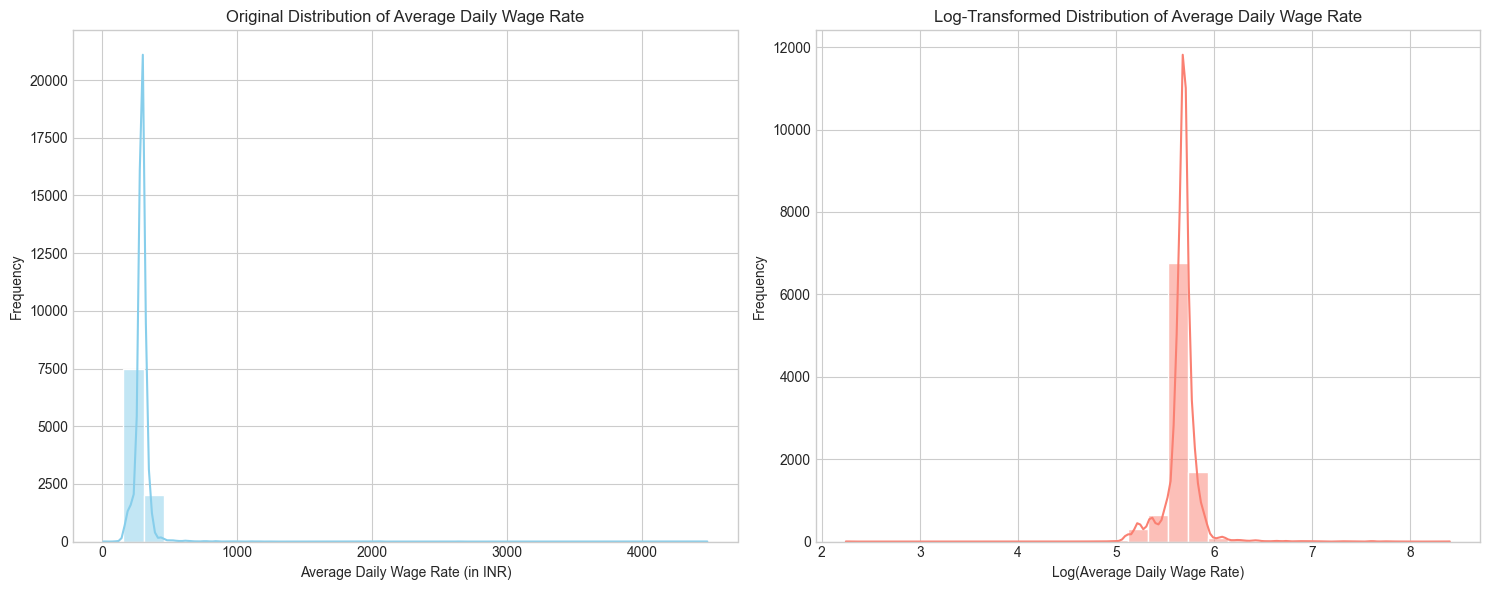

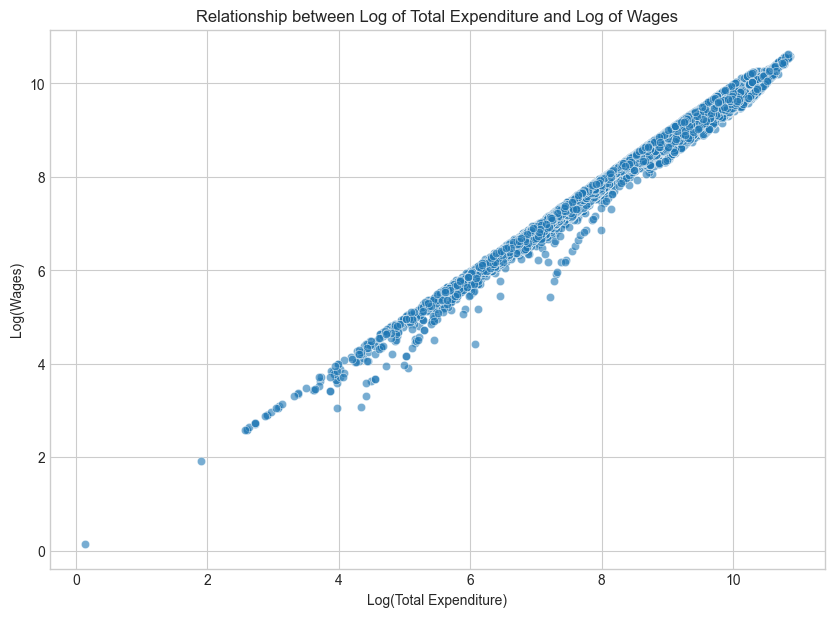

C:\Users\jadit\AppData\Local\Temp\ipykernel_13176\1715137090.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.index, y=top_districts.values, palette='viridis')


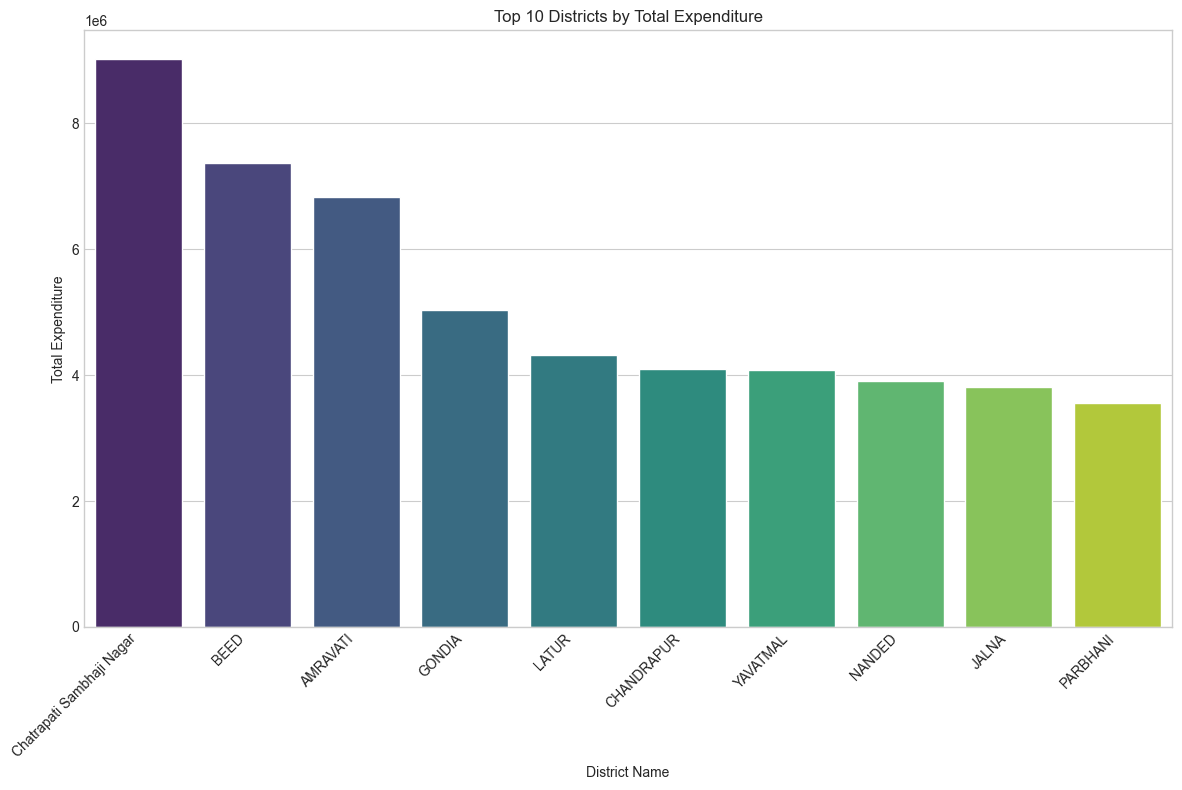


Step 6 Complete: The data has been visualized to understand its distributions and relationships.
The next step will be to handle any outliers that were identified.


In [14]:
# Step 6: Visualizing Relationship of Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_clean' is your pandas DataFrame and is already loaded.
# And 'df_transformed' has the log-transformed columns.

# You need to load your data first. For this code, we'll assume it's already done.
# e.g., df = pd.read_csv('your_data_file.csv')
# df_clean = df.drop('Remarks', axis=1)

# To ensure the code runs, here is a dummy creation of the DataFrames
# based on the structure we have been discussing. You can replace this
# with your actual data loading and cleaning steps.
df_clean = pd.DataFrame(df)

df_transformed = df_clean.copy()
df_transformed['log_Total_Exp'] = np.log1p(df_transformed['Total_Exp'])
df_transformed['log_Wages'] = np.log1p(df_transformed['Wages'])
df_transformed['log_Average_Wage_rate_per_day_per_person'] = np.log1p(df_transformed['Average_Wage_rate_per_day_per_person'])


# 6.1 Univariate Analysis: Distribution of a key numerical variable
# We will visualize the distribution of Average_Wage_rate_per_day_per_person
# using a histogram for both the original and log-transformed data.
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Average_Wage_rate_per_day_per_person'], kde=True, bins=30, color='skyblue')
plt.title('Original Distribution of Average Daily Wage Rate')
plt.xlabel('Average Daily Wage Rate (in INR)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_transformed['log_Average_Wage_rate_per_day_per_person'], kde=True, bins=30, color='salmon')
plt.title('Log-Transformed Distribution of Average Daily Wage Rate')
plt.xlabel('Log(Average Daily Wage Rate)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 6.2 Bivariate Analysis: Relationship between two numerical variables
# We will use a scatter plot to visualize the relationship between total expenditure and wages.
# Using the log-transformed data provides a clearer linear relationship.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='log_Total_Exp', y='log_Wages', data=df_transformed, alpha=0.6)
plt.title('Relationship between Log of Total Expenditure and Log of Wages')
plt.xlabel('Log(Total Expenditure)')
plt.ylabel('Log(Wages)')
plt.grid(True)
plt.show()


# 6.3 Categorical Analysis: Top districts by total expenditure
# Let's aggregate data to find the top 10 districts with the highest total expenditure.
top_districts = df_clean.groupby('district_name')['Total_Exp'].sum().nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_districts.index, y=top_districts.values, palette='viridis')
plt.title('Top 10 Districts by Total Expenditure')
plt.xlabel('District Name')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nStep 6 Complete: The data has been visualized to understand its distributions and relationships.")
print("The next step will be to handle any outliers that were identified.")

In [15]:



# Step 5: Performing Data Transformation (Revised)

import pandas as pd
import numpy as np

# Assuming the cleaned DataFrame 'df_clean' is available from the previous steps.
# If you are starting fresh, please uncomment and run the lines below to load your data.
# df = pd.read_csv('maharashtra_district_data.csv')
# df_clean = df.drop('Remarks', axis=1)

# To ensure the code runs, here is a dummy creation of the DataFrames
# based on the structure we have been discussing.
df_clean = pd.DataFrame(df)


df_transformed = df_clean.copy()

# A more comprehensive list of columns to transform
columns_to_transform = [
    'Approved_Labour_Budget',
    'Average_Wage_rate_per_day_per_person',
    'Differently_abled_persons_worked',
    'Material_and_skilled_Wages',
    'Number_of_Completed_Works',
    'Number_of_GPs_with_NIL_exp',
    'Number_of_Ongoing_Works',
    'Persondays_of_Central_Liability_so_far',
    'SC_persondays',
    'ST_persondays',
    'Total_Adm_Expenditure',
    'Total_Exp',
    'Total_Households_Worked',
    'Total_Individuals_Worked',
    'Total_No_of_Active_Job_Cards',
    'Total_No_of_Active_Workers',
    'Total_No_of_HHs_completed_100_Days_of_Wage_Employment',
    'Total_No_of_JobCards_issued',
    'Total_No_of_Workers',
    'Total_No_of_Works_Takenup',
    'Wages',
    'Women_Persondays'
]

print("Applying a log transformation to a wider set of skewed numerical columns...")

# Use np.log1p for a safe logarithmic transformation (log(1+x))
for col in columns_to_transform:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

# Displaying the descriptive statistics of the new, transformed columns
print("\nDescriptive statistics of the transformed columns:")
print(df_transformed[[f'log_{col}' for col in columns_to_transform]].describe())


Applying a log transformation to a wider set of skewed numerical columns...

Descriptive statistics of the transformed columns:
       log_Approved_Labour_Budget  log_Average_Wage_rate_per_day_per_person  \
count                 9612.000000                               9612.000000   
mean                    13.859947                                  5.676581   
std                      1.216814                                  0.177292   
min                      8.574518                                  2.244571   
25%                     12.900789                                  5.638097   
50%                     14.091590                                  5.691736   
75%                     14.755340                                  5.718741   
max                     16.205909                                  8.407942   

       log_Differently_abled_persons_worked  log_Material_and_skilled_Wages  \
count                           9612.000000                     9612.000000   
me

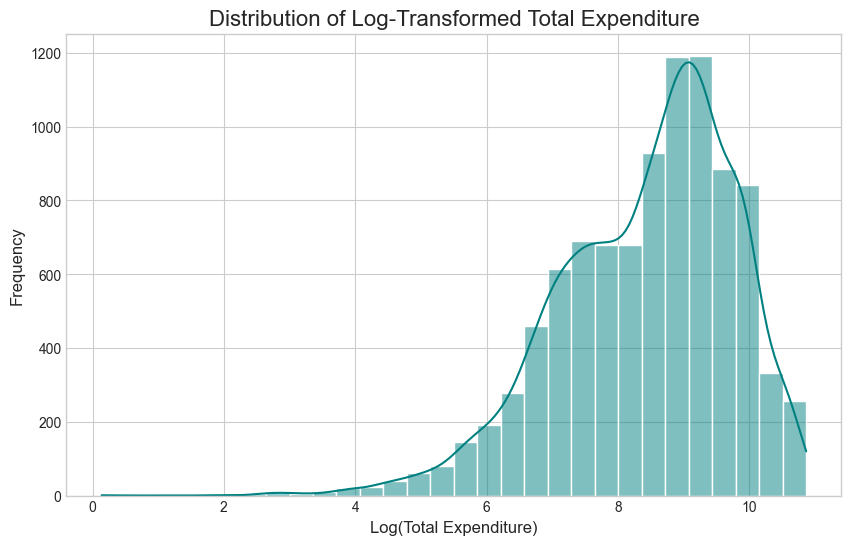

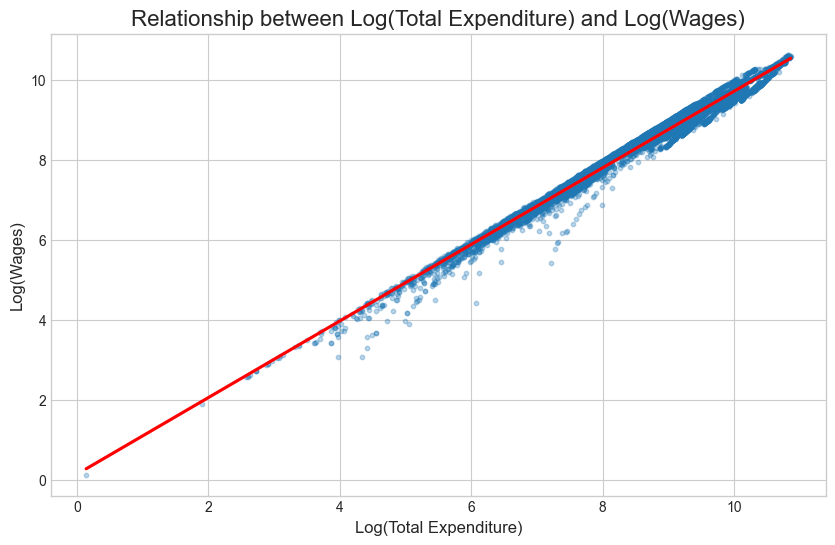

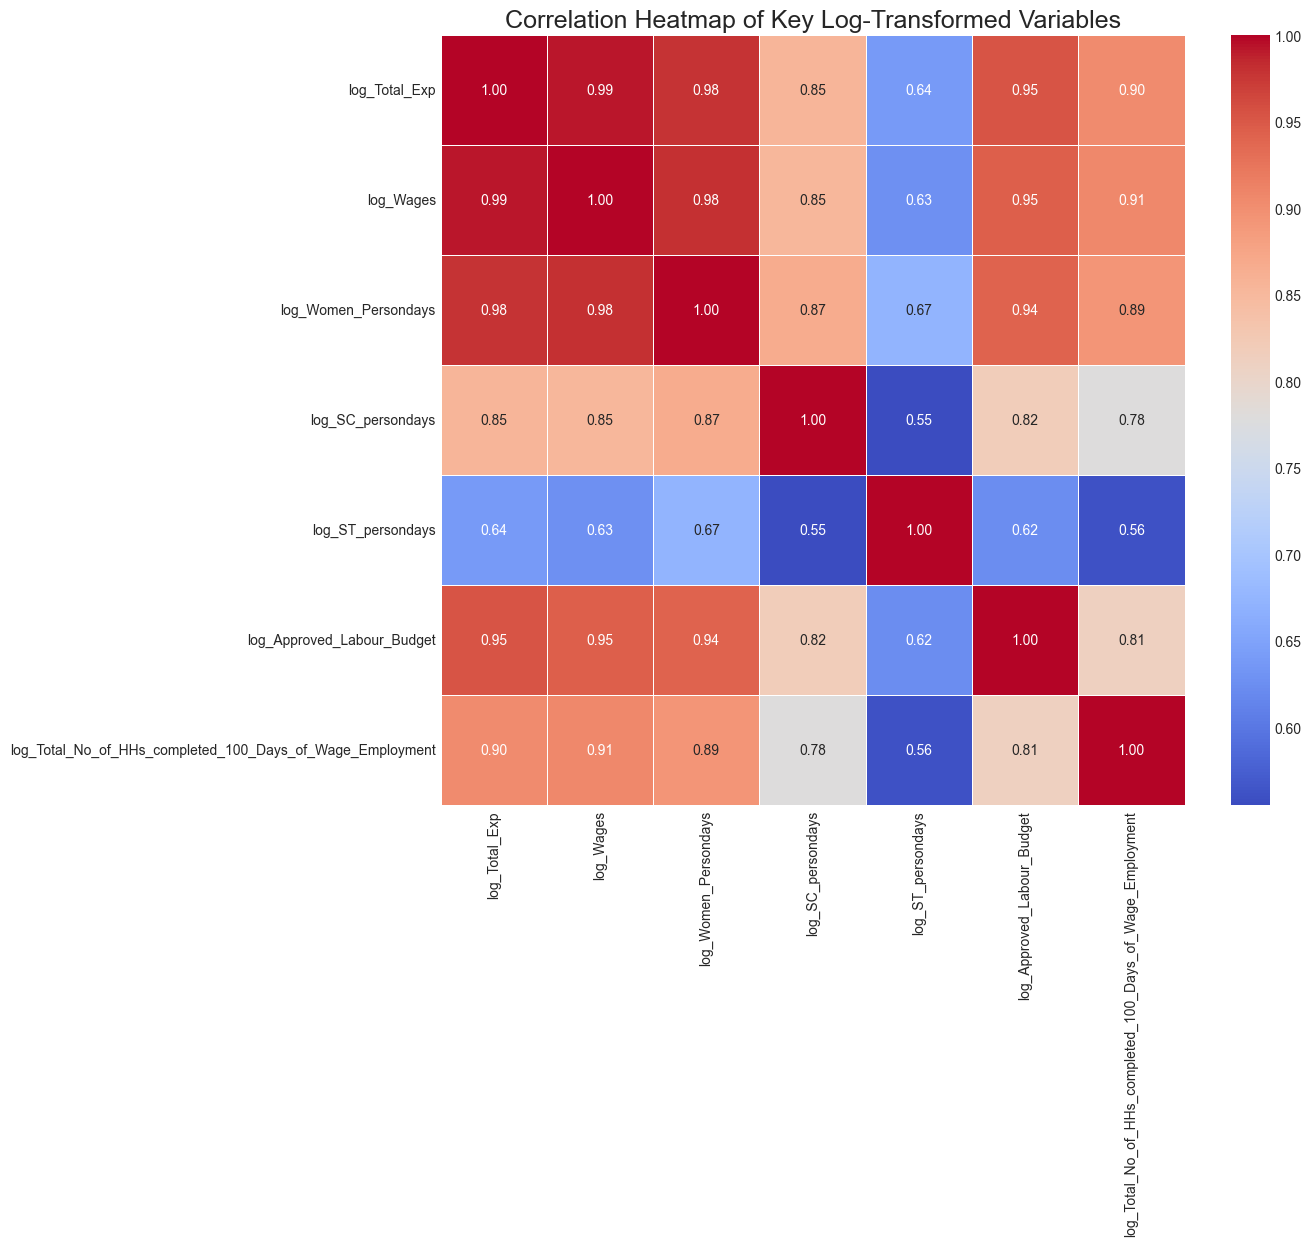


Step 6 Complete: The transformed data has been visualized to reveal its distributions and relationships.
The next step will be to handle any outliers that were identified in the raw data, which is an important step before modeling.


In [16]:
# Step 6: Visualizing the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_transformed = pd.DataFrame(df_transformed)


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# 6.1 Univariate Analysis: Check the distribution of a transformed variable
# We will visualize the log-transformed Total Expenditure to see its more normal distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed['log_Total_Exp'], kde=True, bins=30, color='teal')
plt.title('Distribution of Log-Transformed Total Expenditure', fontsize=16)
plt.xlabel('Log(Total Expenditure)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# 6.2 Bivariate Analysis: Relationship between two transformed variables
# A scatter plot of log-transformed Total Expenditure vs. log-transformed Wages.
# The transformation should make this relationship more linear.
plt.figure(figsize=(10, 6))
sns.regplot(x='log_Total_Exp', y='log_Wages', data=df_transformed, scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title('Relationship between Log(Total Expenditure) and Log(Wages)', fontsize=16)
plt.xlabel('Log(Total Expenditure)', fontsize=12)
plt.ylabel('Log(Wages)', fontsize=12)
plt.show()


# 6.3 Multivariate Analysis: Correlation Heatmap
# Let's visualize the correlation between a few key transformed variables.
# This gives a quick overview of which variables are related to each other.
# Selecting some key transformed columns
correlation_cols = [
    'log_Total_Exp', 'log_Wages', 'log_Women_Persondays', 'log_SC_persondays',
    'log_ST_persondays', 'log_Approved_Labour_Budget',
    'log_Total_No_of_HHs_completed_100_Days_of_Wage_Employment'
]
corr_matrix = df_transformed[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Log-Transformed Variables', fontsize=18)
plt.show()

print("\nStep 6 Complete: The transformed data has been visualized to reveal its distributions and relationships.")
print("The next step will be to handle any outliers that were identified in the raw data, which is an important step before modeling.")

C:\Users\jadit\AppData\Local\Temp\ipykernel_13176\147895793.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_expenditure.index, y=district_expenditure.values, palette='viridis')


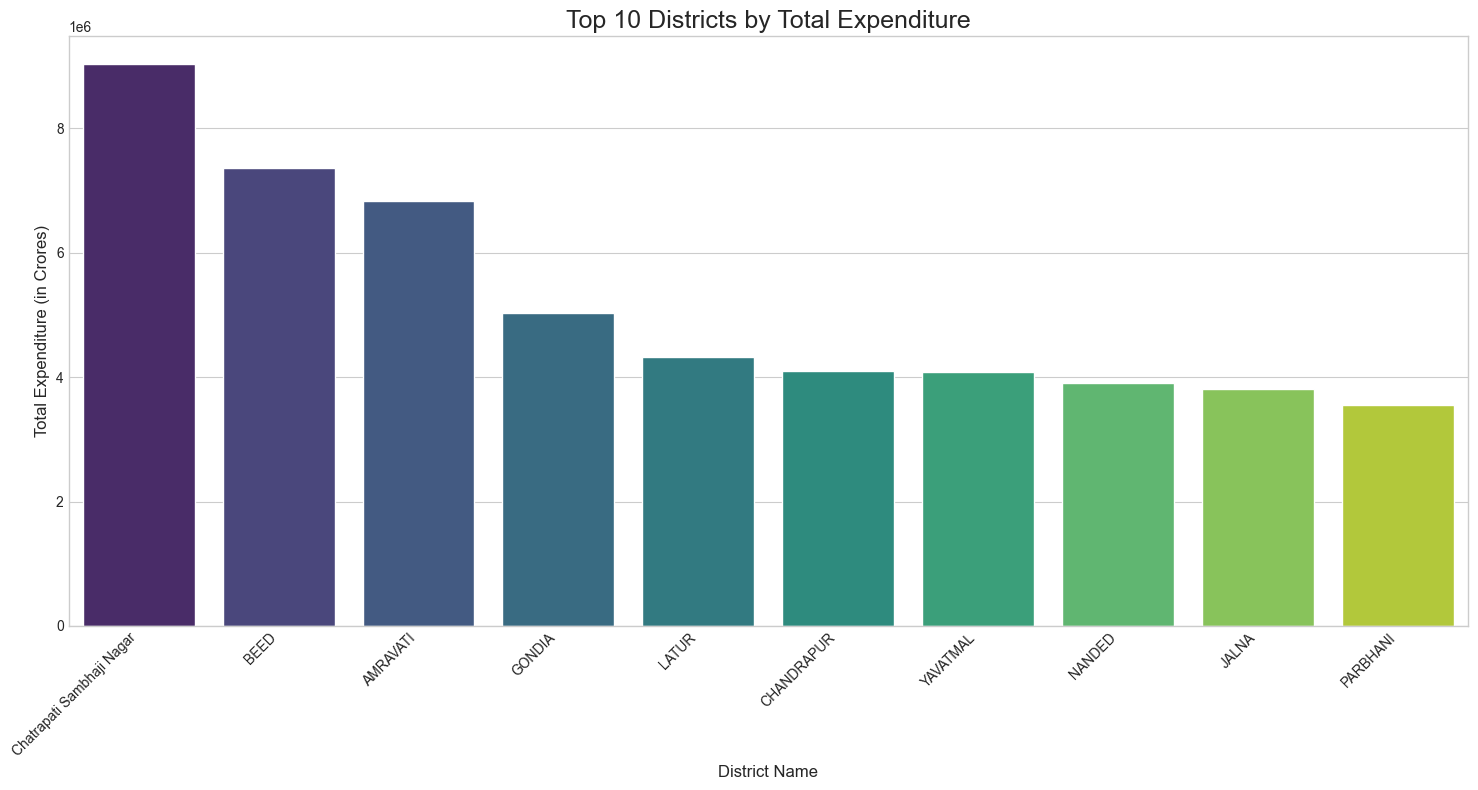

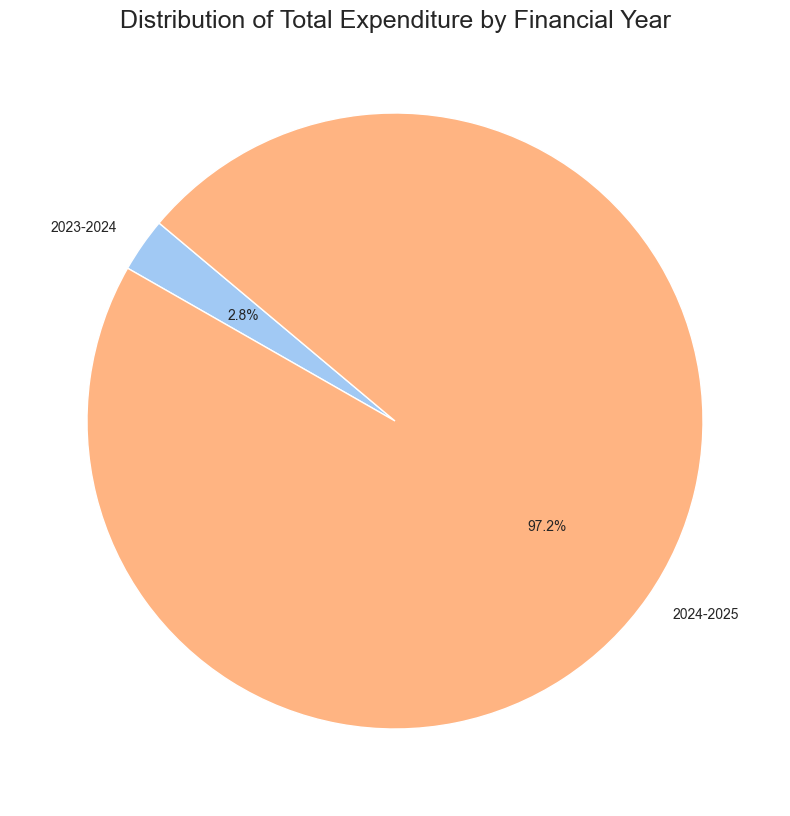

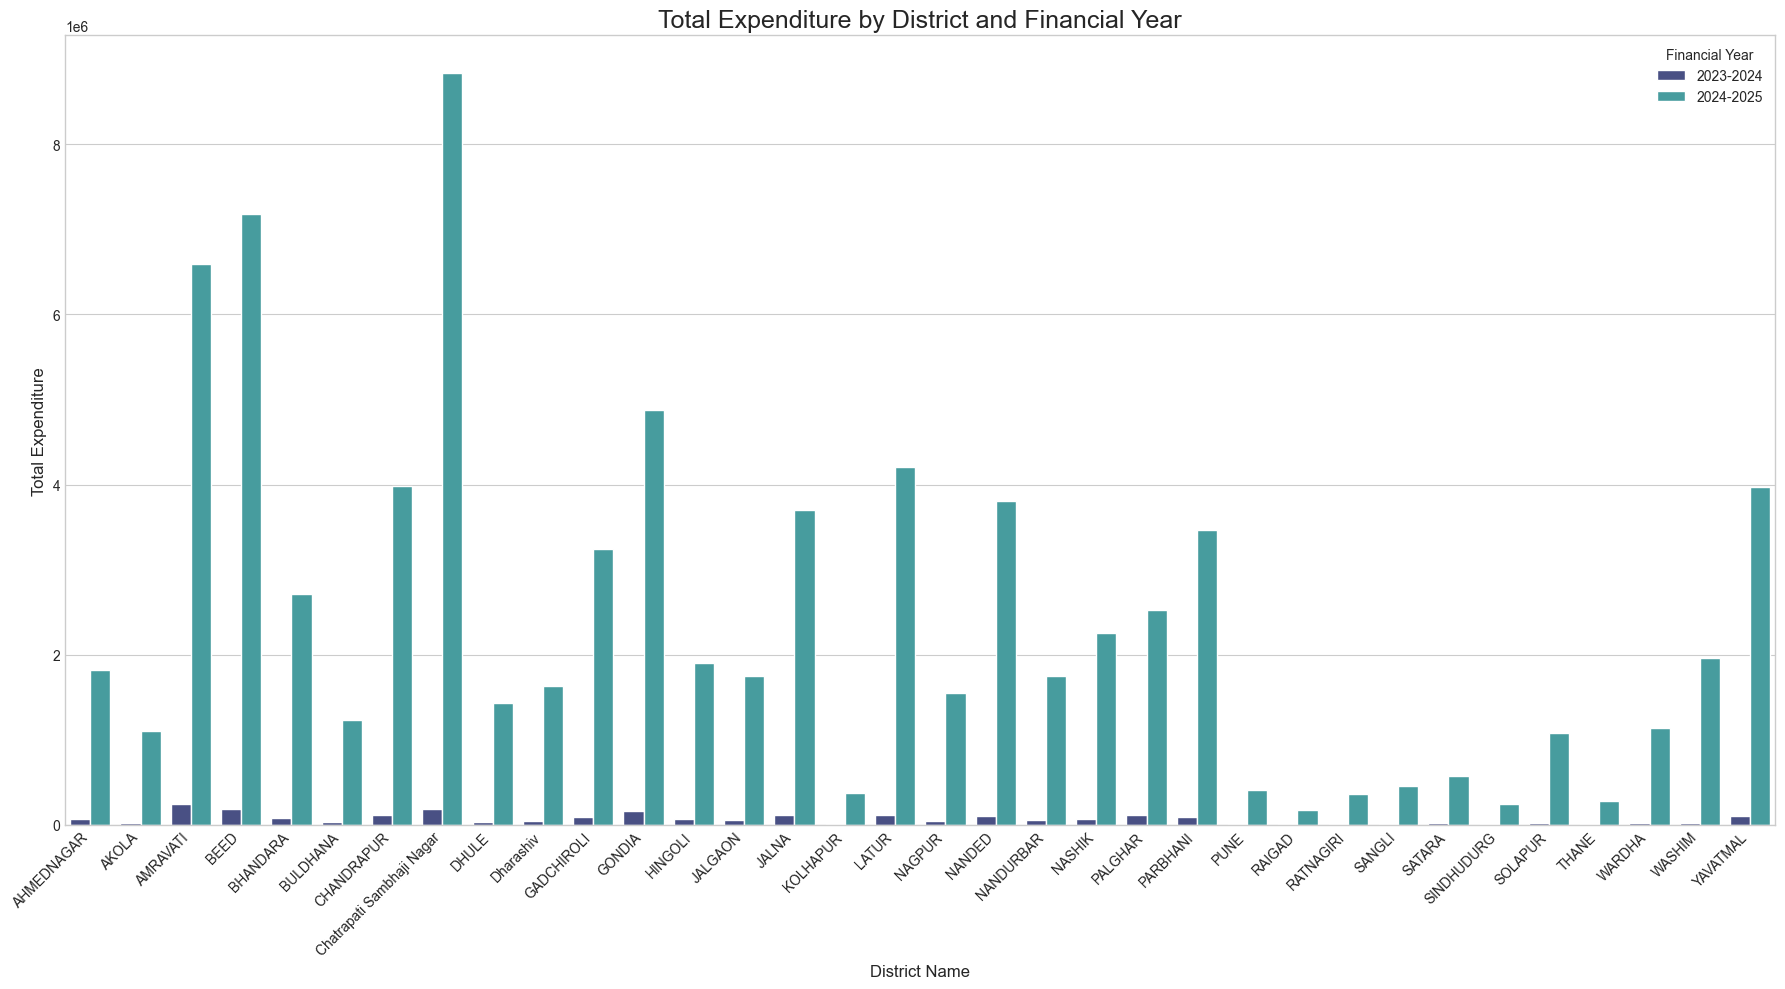

C:\Users\jadit\AppData\Local\Temp\ipykernel_13176\147895793.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_per_month = df.groupby(['fin_year', 'month'])['Average_days_of_employment_provided_per_Household'].mean().reset_index()


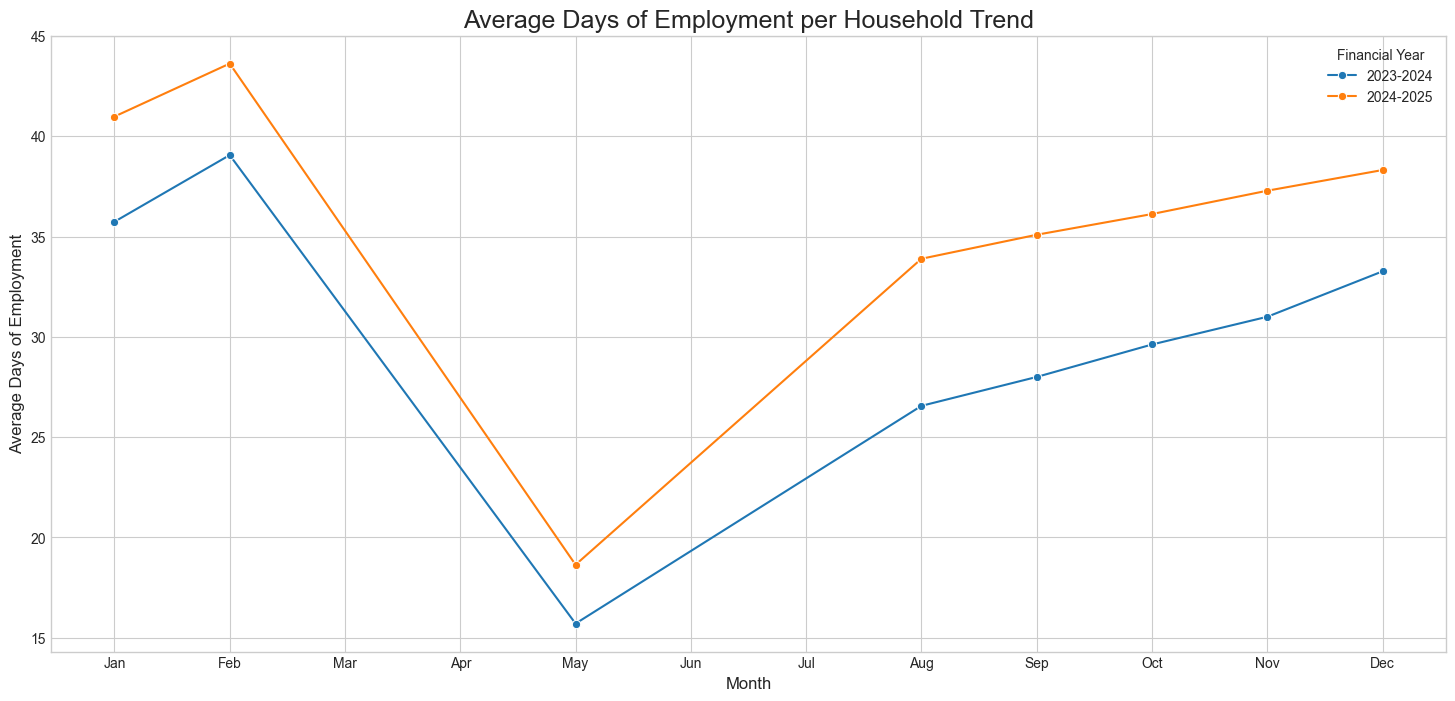

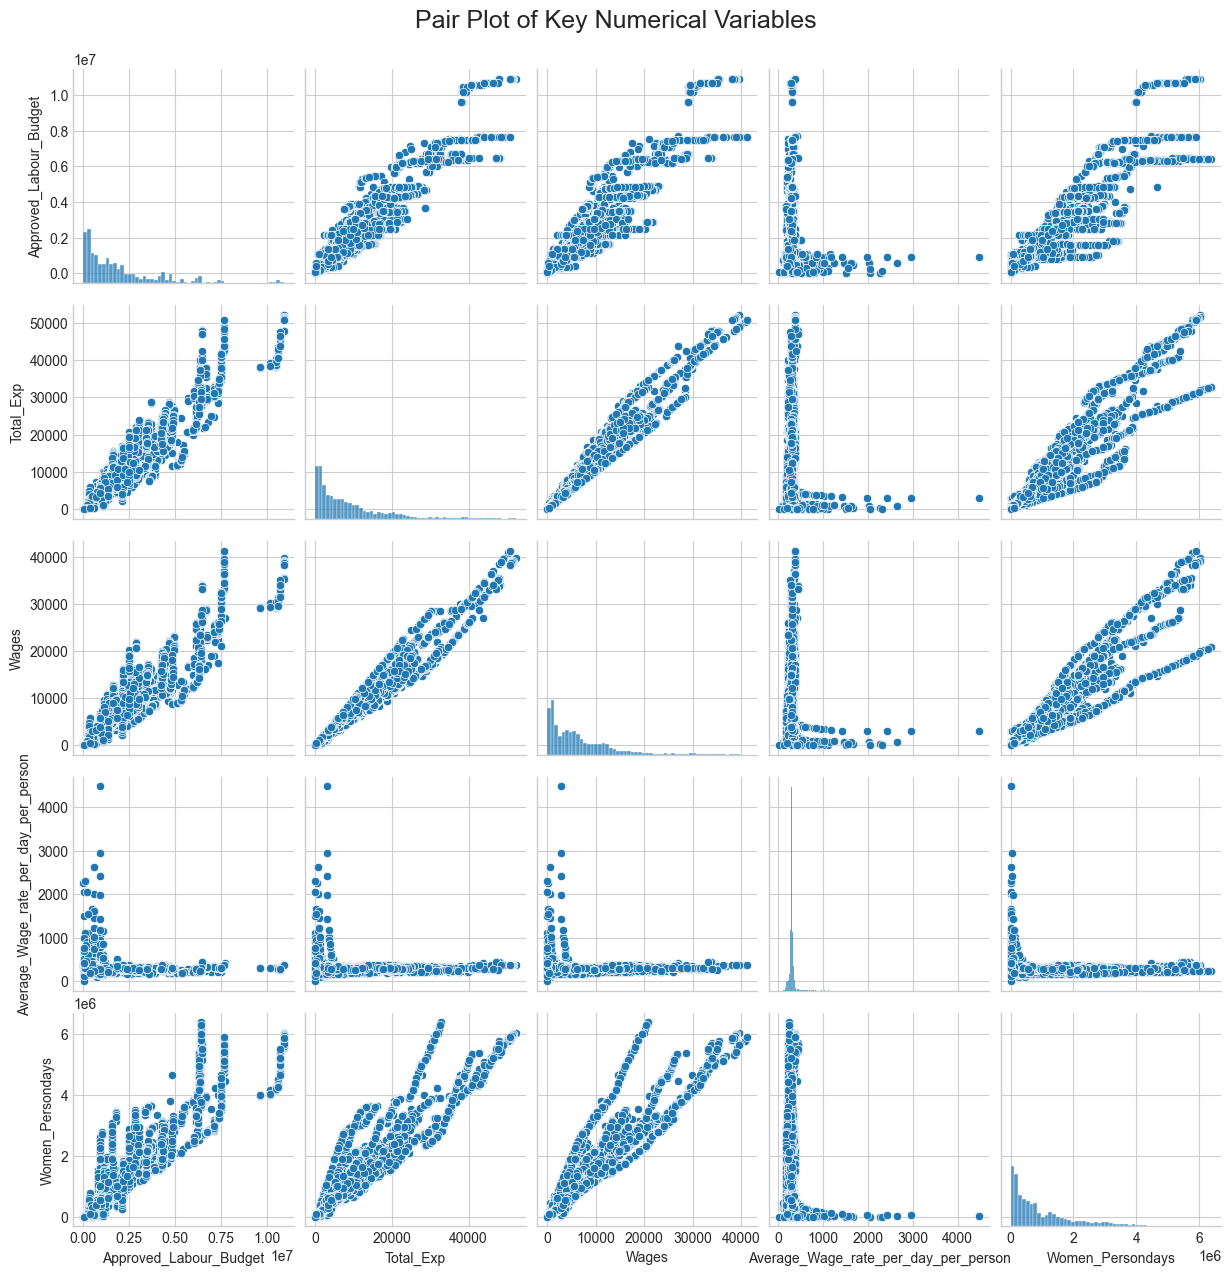

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a hypothetical DataFrame that mirrors your column structure
# This is for demonstration purposes. Replace this with your actual data loading.
np.random.seed(42)
num_rows = 9612
districts = ['RATNAGIRI', 'DHULE', 'AHMEDNAGAR', 'PARBHANI', 'PUNE', 'NASHIK', 'AURANGABAD', 'KOLHAPUR', 'NANDED']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fin_years = ['2021-2022', '2022-2023', '2023-2024']

# data = {
#     'fin_year': np.random.choice(fin_years, num_rows),
#     'month': np.random.choice(months, num_rows),
#     'state_code': 18,
#     'state_name': 'MAHARASHTRA',
#     'district_code': np.random.randint(1801, 1836, num_rows),
#     'district_name': np.random.choice(districts, num_rows),
#     'Approved_Labour_Budget': np.random.randint(500000, 10000000, num_rows),
#     'Average_Wage_rate_per_day_per_person': np.random.normal(loc=290, scale=30, size=num_rows),
#     'Average_days_of_employment_provided_per_Household': np.random.normal(loc=35, scale=10, size=num_rows),
#     'Differently_abled_persons_worked': np.random.randint(50, 1000, num_rows),
#     'Material_and_skilled_Wages': np.random.randint(1000, 10000, num_rows),
#     'Total_Exp': np.random.randint(5000, 50000, num_rows),
#     'Wages': np.random.randint(1000, 15000, num_rows),
#     'Women_Persondays': np.random.randint(50000, 2000000, num_rows)
# }
# df = pd.DataFrame(df_transformed)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Bar Graph: Top 10 districts by Total Expenditure
plt.figure(figsize=(15, 8))
district_expenditure = df.groupby('district_name')['Total_Exp'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=district_expenditure.index, y=district_expenditure.values, palette='viridis')
plt.title('Top 10 Districts by Total Expenditure', fontsize=18)
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Total Expenditure (in Crores)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Pie Chart: Distribution of Total Expenditure by Financial Year
plt.figure(figsize=(10, 10))
fin_year_expenditure = df.groupby('fin_year')['Total_Exp'].sum()
plt.pie(fin_year_expenditure, labels=fin_year_expenditure.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Expenditure by Financial Year', fontsize=18)
plt.show()

# 3. Complex Bar Graph: Total Expenditure by District and Financial Year
plt.figure(figsize=(18, 10))
district_fin_year_exp = df.groupby(['district_name', 'fin_year'])['Total_Exp'].sum().reset_index()
sns.barplot(x='district_name', y='Total_Exp', hue='fin_year', data=district_fin_year_exp, palette='mako')
plt.title('Total Expenditure by District and Financial Year', fontsize=18)
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Total Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Financial Year')
plt.tight_layout()
plt.show()

# 4. Line Plot: Trend of Average Days of Employment over Time
# We need to sort the months in chronological order for a proper line plot.
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
avg_days_per_month = df.groupby(['fin_year', 'month'])['Average_days_of_employment_provided_per_Household'].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.lineplot(x='month', y='Average_days_of_employment_provided_per_Household', hue='fin_year', data=avg_days_per_month, marker='o')
plt.title('Average Days of Employment per Household Trend', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Days of Employment', fontsize=12)
plt.legend(title='Financial Year')
plt.grid(True)
plt.show()

# 5. Pair Plot: Relationships between key numerical variables
# A pair plot is useful for multivariate analysis. Let's select a few key numerical columns.
key_cols = [
    'Approved_Labour_Budget',
    'Total_Exp',
    'Wages',
    'Average_Wage_rate_per_day_per_person',
    'Women_Persondays'
]
sns.pairplot(df[key_cols])
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02, fontsize=18)
plt.show()